# DIOMIRA Kublai

## Running DIOMIRA NB

In [1]:
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cProfile

In [2]:
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time

In [3]:
%matplotlib inline

In [14]:
import mplFunctions as mpl
import wfmFunctions as wfm

In [4]:
print(time.strftime("%d/%m/%Y"))

29/09/2016


In [5]:
print(time.strftime("%H:%M:%S"))

15:06:53


## Running Diomira

### Python version

In [6]:
%less ../../Config/DIOMIRA_NA_ZLIB_test2.csv

In [8]:
%run ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv 

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_twf10_RWF.h5
first event = 0 last event = 10 nof events requested = 10 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 
lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000
INFO:root:-->event number =0


-->event number =0


INFO:root:-->event number =1


-->event number =1


INFO:root:-->event number =2


-->event number =2


INFO:root:-->event number =3


-->event number =3


INFO:root:-->event number =4


-->event number =4


INFO:root:-->event number =5


-->event number =5


INFO:root:-->event number =6


-->event number =6


INFO:root:-->event number =7


-->event number =7


INFO:root:-->event number =8


-->event number =8


INFO:root:-->event number =9


-->event number =9


Leaving Diomira. Safe travels!


### Checking file

In [9]:
%ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5'

-rw-r--r--  1 jjgomezcadenas  staff    10M Sep 29 15:09 /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5


Abou 1 M per event!

In [10]:
h5f =tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5')

In [11]:
h5f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=1, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "AC": Float32Col(shape=(12,), dflt=0.0, pos=5),
  "time_step": Float32Col

In [12]:
pmtrwf = h5f.root.RD.pmtrwf

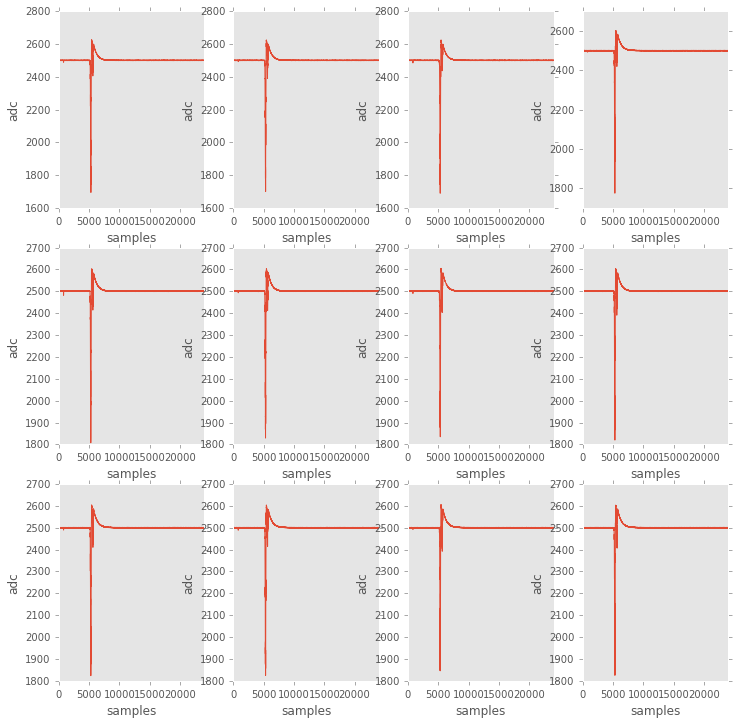

Press a key...


In [15]:
mpl.scan_waveforms(pmtrwf,list_of_events=[0])

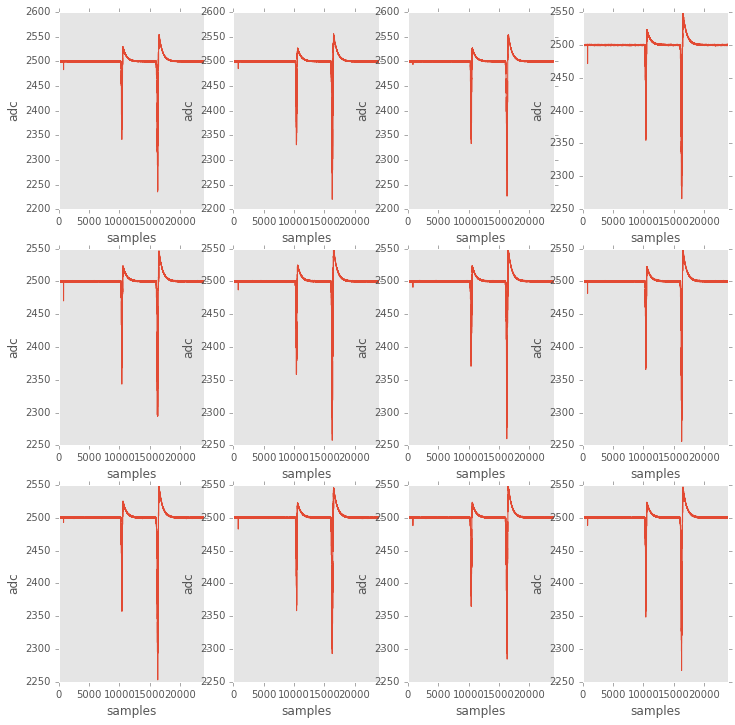

Press a key...


In [19]:
mpl.scan_waveforms(pmtrwf,list_of_events=[3])

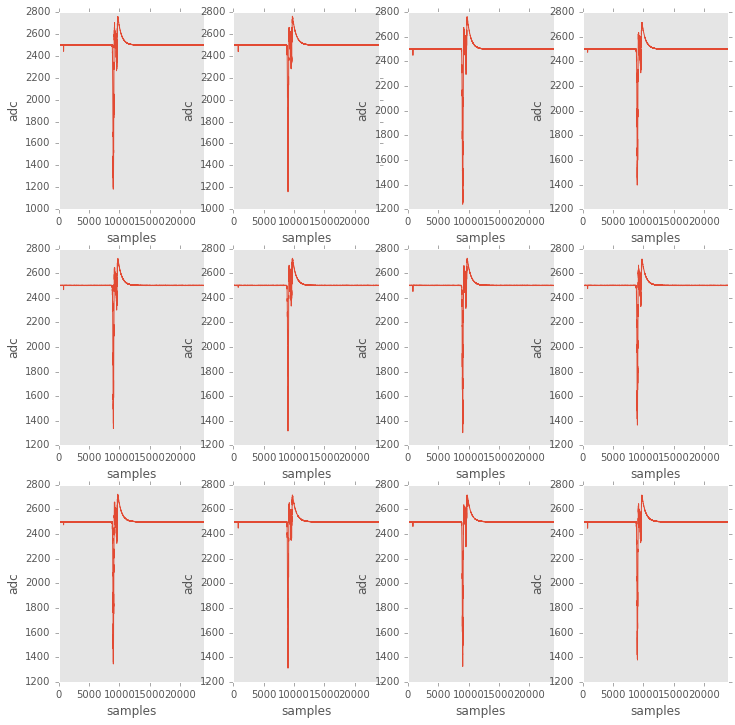

Press a key...


In [20]:
mpl.scan_waveforms(pmtrwf,list_of_events=[2])

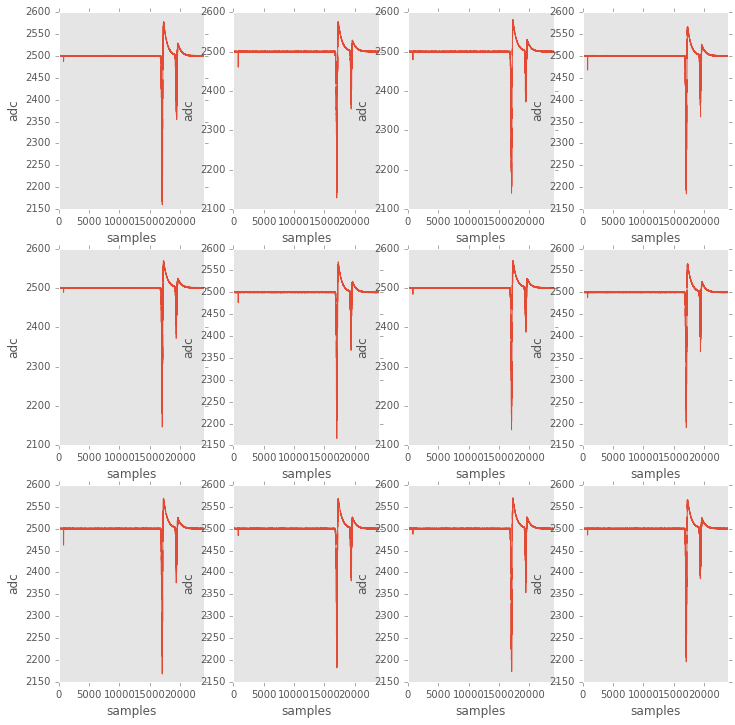

Press a key...


In [23]:
mpl.scan_waveforms(pmtrwf,list_of_events=[6])

### Profiling

In [29]:
!python -m cProfile -o ../../Prof/diomira_py_29_9_16.stat ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_twf10_RWF.h5
first event = 0 last event = 10 nof events requested = 10 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 
lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000
-->event number =0
-->event number =1
-->event number =2
-->event number =3
-->event number =4
-->event number =5
-->event number =6
-->event number =7
-->event number =8
-->event number =9
Leaving Diomira. Safe travels!


#### Examine pstats file

In [30]:
import pstats
p = pstats.Stats('../../Prof/diomira_py_29_9_16.stat')
p.sort_stats('time').print_stats(10)

Thu Sep 29 15:28:34 2016    ../../Prof/diomira_py_29_9_16.stat

         1546205 function calls (1536601 primitive calls) in 15.035 seconds

   Ordered by: internal time
   List reduced from 4802 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    29001    3.518    0.000    3.518    0.000 {numpy.core.multiarray.array}
     1560    2.199    0.001    2.199    0.001 {numpy.core.multiarray.correlate}
      120    2.192    0.018    2.192    0.018 {method 'normal' of 'mtrand.RandomState' objects}
      240    0.806    0.003    0.806    0.003 {scipy.signal.sigtools._linear_filter}
    18160    0.752    0.000    0.752    0.000 {method '_g_read_slice' of 'tables.hdf5extension.Array' objects}
     4297    0.710    0.000    0.710    0.000 {range}
       10    0.461    0.046    5.884    0.588 ../../Cities/DIOMIRA.py:116(twf_signal)
      120    0.292    0.002    3.298    0.027 /Users/jjgomezcadenas/Documents/Development/NEXT/IC/Sierpe/FEE2.py:

<pstats.Stats instance at 0x10e1fc908>

*1.5 seconds per event*

### Test run with 100 events

In [31]:
h5f.close()

In [32]:
%less ../../Config/DIOMIRA_NA_ZLIB_test2.csv

In [34]:
!python -m cProfile -o ../../Prof/diomira_py_29_9_16_2.stat ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_test100_RWF.h5
first event = 0 last event = 100 nof events requested = 100 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 
lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000
-->event number =0
-->event number =1
-->event number =2
-->event number =3
-->event number =4
-->event number =5
-->event number =6
-->event number =7
-->event number =8
-->event number =9
-->event number =10
-->event number =11
-->event number =12
-->event number =13
-->event number =14
-->event number =15
-->event number =16
-->event number =17
-->event number =18
-->event number =19
-->event number =20
-->event number =21
-->event number =22
-->event number =23
-->event number =2

In [36]:
p = pstats.Stats('../../Prof/diomira_py_29_9_16_2.stat')
p.sort_stats('time').print_stats(10)

Thu Sep 29 17:51:14 2016    ../../Prof/diomira_py_29_9_16_2.stat

         10693762 function calls (10650678 primitive calls) in 147.950 seconds

   Ordered by: internal time
   List reduced from 4801 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   253164   37.241    0.000   37.241    0.000 {numpy.core.multiarray.array}
     1200   23.412    0.020   23.412    0.020 {method 'normal' of 'mtrand.RandomState' objects}
    15600   22.880    0.001   22.880    0.001 {numpy.core.multiarray.correlate}
   181600    9.105    0.000    9.105    0.000 {method '_g_read_slice' of 'tables.hdf5extension.Array' objects}
     2400    8.512    0.004    8.512    0.004 {scipy.signal.sigtools._linear_filter}
    26458    7.689    0.000    7.689    0.000 {range}
      100    4.888    0.049   63.654    0.637 ../../Cities/DIOMIRA.py:125(twf_signal)
     1200    3.075    0.003   35.096    0.029 /Users/jjgomezcadenas/Documents/Development/NEXT/IC/Sierpe/FEE

<pstats.Stats instance at 0x1135ad4d0>

In [37]:
ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_test100_RWF.h5'

-rw-r--r--  1 jjgomezcadenas  staff    57M Sep 29 17:51 /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_test100_RWF.h5


In [38]:
h5f =tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_test100_RWF.h5')

In [39]:
h5f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_test100_RWF.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=1, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "AC": Float32Col(shape=(12,), dflt=0.0, pos=5),
  "time_step": Float32C

In [40]:
pmtrwf = h5f.root.RD.pmtrwf

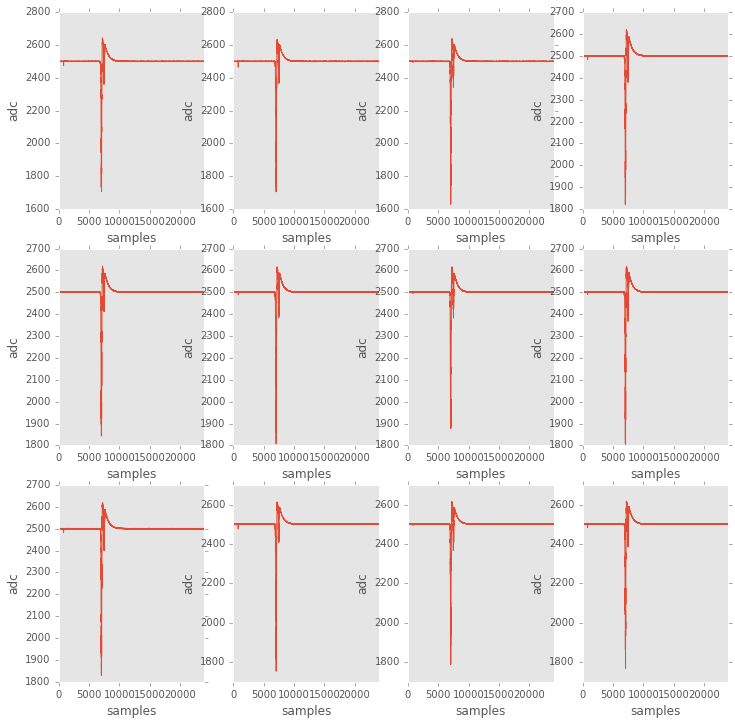

Press a key...


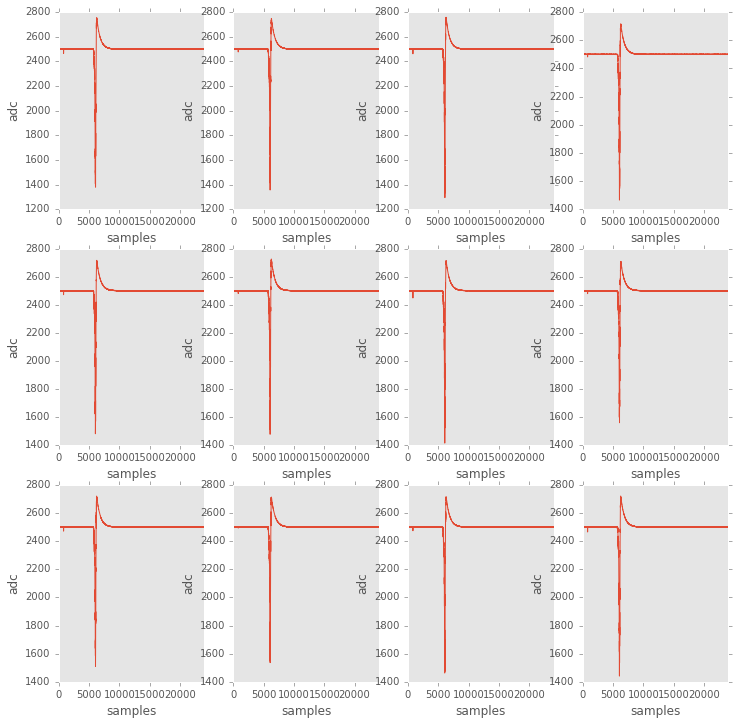

Press a key...


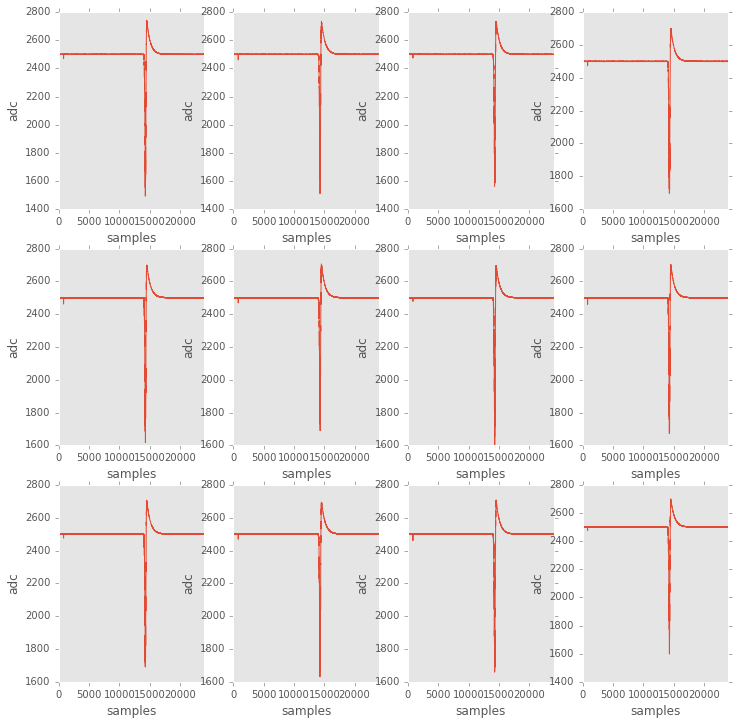

Press a key...


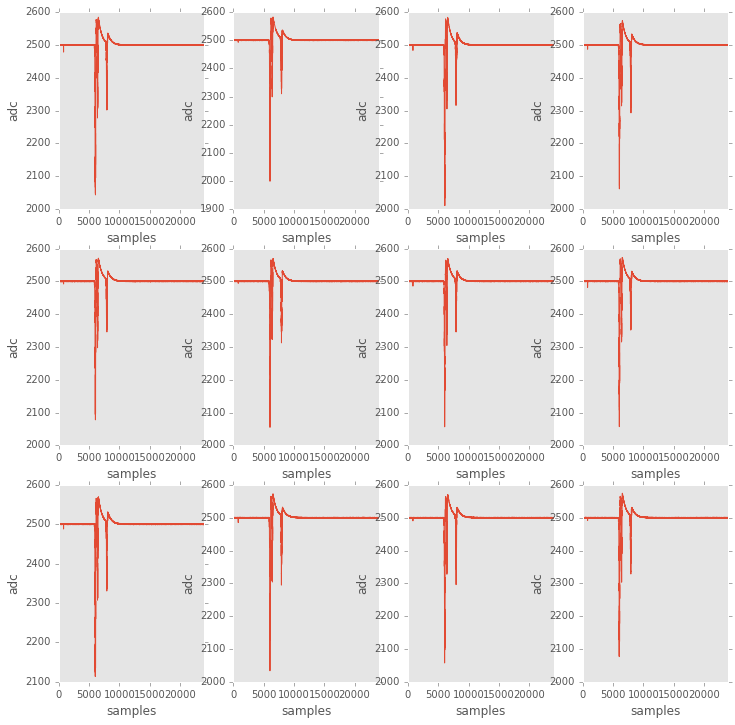

Press a key...


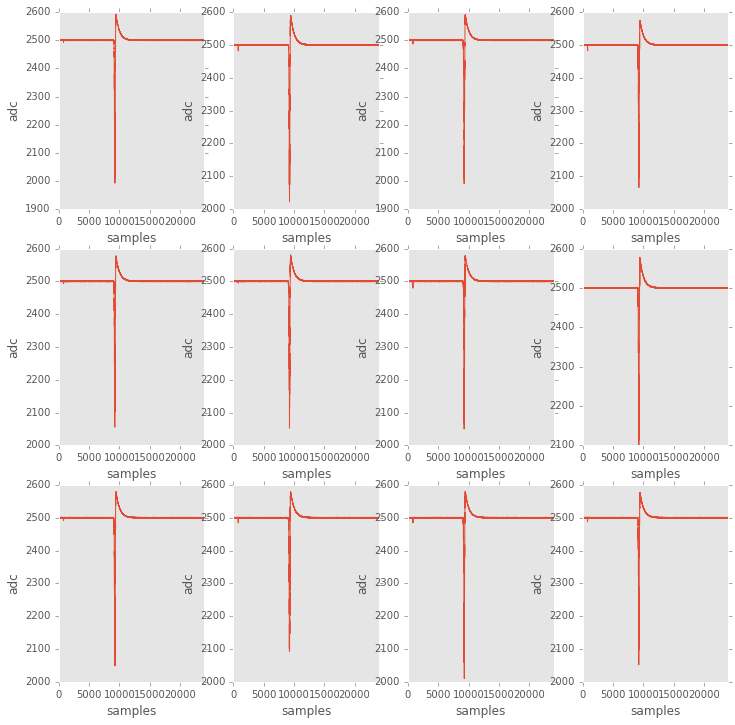

Press a key...


In [41]:
mpl.scan_waveforms(pmtrwf,list_of_events=[10,20,30,50,90])

In [42]:
h5f.close()